<h1 style="font-size:50px">Naive Bayes</h1>

<h2 style="font-size:30px"> Intro to Bayes Theorem</h2>

It is a way to solve conditional probabilty. Although it is a powerful tool in probabilty, Bayes Theorem is also widely used in the field of Machine Learning.
<br>


<h3>Bayes Theorem</h3>
In this post we will discover Bayes Theorem for calculating conditional probabilities and how it is used in solving machie learning problems.<br>

<h4>Overview</h4>
    <ul>
    <li>Bayes Theorem in Conditional Probabilty</li>
    <li>Worked Example for Calculating Bayes Theorem<ul><li>Python Code Calculation</li></ul></li>
    <li>Bayes Theorem for Classification
        <ul>
            <li>Naïve Bayes Classifier</li>
            <li>Optimal Classifier</li>
        </ul>
    </li>
    <li>More Uses of Bayes Theorem in Machine Learning
        <ul>
            <li>Bayesian optimisation</li>
            <li>Bayesian belief networks</li>
        </ul>
    </li>
    </ul>  

<h4 style="text-align:center;font-size:30px"><span style="font-size:60px">1. </span>Bayes theorem in Conditional Probability</h4><br>


Before we dive into Bayes theorem, let’s review marginal, joint, and conditional probability.
<ul>
    <li><b>Marginal Probability:</b></li><span>The probability of an event irrespective of the outcomes of other random variables, e.g. P(A).</span>
    <li><b>Joint Probability:</b></li><span>Probability of two (or more) simultaneous events, e.g. P(A and B) or P(A, B).</span>
    <li><b>Conditional Probability:</b></li><span>Probability of one (or more) event given the occurrence of another event, e.g. P(A given B) or P(A | B).</span>
    <ol>
        <li>P(A, B) = P(A | B) * P(B)</li>
        <li>P(A, B) = P(B, A)</li>
        <li>P(A | B) = P(A, B) / P(B)</li>
        <li>P(A | B) != P(B | A)</li>
    </ol>
</ul>


<img src="https://pbiswas101.files.wordpress.com/2018/10/conditional-probability.png?w=450"><br>



Now there is another way to calculate conditional probabilty.
<ul>
    <li>P(A|B) = P(B|A) * P(A) / P(B)</li>
    <li>P(B|A) = P(A|B) * P(B) / P(A)</li>
</ul>
This alternate way is called Bayes Theorem.
<br>

### Bayes Theorem
Principled way of calculating a conditional probability without the joint probability. This alternate approach of calculating the conditional probability is useful either when the joint probability is challenging to calculate (which is most of the time), or when the reverse conditional probability is available or easy to calculate.

![Bayes-Theorem](https://pathmind.com/images/wiki/bayes_theorem.jpg)
<br>

<ul>
    <li><b>Calculating P(B)</b></li>
    <b>P(B) = P(B|A) * P(A) + P(B|not A) * P(not A)</b><br>
    So, <b>P(A|B) = P(B|A) * P(A) / (P(B|A) * P(A) + P(B|not A) * P(not A))</b><br>
    Additionally, <b>P(B|not A) = 1 – P(not B|not A)</b>
</ul>

<b>Some Terms we would be using frequently</b>
<ul>
    <li>  <b>P(A|B) :  </b>Posterior probability.</li>
    <li>    <b>P(A) :  </b>Prior probability.</li>
    <li>  <b>P(B|A) :  </b>Likelihood.</li>
    <li>    <b>P(B) :  </b>Evidence.</li>
</ul>


<img src="https://miro.medium.com/max/1994/1*CnoTGGO7XeUpUMeXDrIfvA.png" width="400">
<br>




<h4 style="text-align:center;font-size:30px"><span style="font-size:60px">2. </span>Worked Example for Calculating Bayes Theorem</h4><br>


Points to be covered...
<ol>
    <li>Diagnostic Test Scenario</li>
    <li>Manual Calculation</li>
    <li>Python Code Calculation</li>
    <li>Binary Classifier Terminology</li>
</ol>
<br>

<b>Diagnostic Test Scenario</b>
<p style="margin-left:50px"><b>Scenario: </b>Consider a human population that may or may not have cancer (Cancer is True or False) and a medical test that returns positive or negative for detecting cancer (Test is Positive or Negative), e.g. like a mammogram for detecting breast cancer.
</p>
<p style="margin-left:50px"><b>Problem: </b>If a randomly selected patient has the test and it comes back positive, what is the probability that the patient has cancer?
</p>
<br>

<b>Manual Calculation</b>
<p style="margin-left:50px">The capability of the test to detect cancer is referred to as the sensitivity, or the true positive rate.
<br> 
<br>
<b>P(Test=Positive | Cancer=True) = 0.85</b>
This means, of all the people who have cancer and are tested, 85% of them will get a positive result from the test. Given this information, our intuition would suggest that there is an 85% probability that the patient has cancer.
<br> 
<br>
<b>Our intuitions of probability are wrong</b>
<br>
Because of base rate fallacy, ie suppose there are total 5000 persons tested for cancer out of these only one is actually having malignant tumor that mean <b>P(Cancer=True) = 0.02%(0.0002)</b>. So, even if we had <b>P(Test=Positive | Cancer=True) = 0.85</b>, even tests that have very low chance of giving the number of false-positives in an individual would be giving more false than true-positives. 
<br>
We can correctly calculate the probability of a patient having cancer given a positive test result using Bayes Theorem.
</p>
<p style="margin-left:50px">
    Let's map our scenario onto the equation:
    </p>
<ul style="margin-left:50px"><li>P(Cancer=True | Test=Positive) = P(Test=Positive|Cancer=True) * P(Cancer=True) / P(Test=Positive)</li></ul>
<p style="margin-left:50px">As we already know,
P(Test=Positive|Cancer=True) = 0.85 and P(Cancer=True) = 0.0002.
<br>
We don't know P(Test=Positive), that's not given directly.
<br>
<br>
Instead we can estimate it by,</p><br>
<ul style="margin-left:50px">
    <li>P(Test=Positive) = P(Test=Positive|Cancer=True) * P(Cancer=True) + P(Test=Positive|Cancer=False) * P(Cancer=False)</li>
    <li><b>P(Cancer=False) = 1 – P(Cancer=True)</b> implies P(Cancer=False)  =0.9998</li>
    <li>So, P(Test=Positive) = 0.85 * 0.0002 + P(Test=Positive|Cancer=False) * 0.9998</li>
</ul>
<p style="margin-left:50px">We still need to find P(Test=Positive|Cancer=False) which requires additional information.
<br>
We will use a contrived specificity value of 95%.</p>
<ul style="margin-left:50px"><li>P(Test=Negative | Cancer=False) = 0.95</li>
    <li><b>P(Test=Positive|Cancer=False) = 1 – P(Test=Negative | Cancer=False)</b> implies P(Test=Positive|Cancer=False)=0.05</li>
</ul>

<p style="margin-left:50px">So, P(Test=Positive) = 0.85 * 0.0002 + 0.05 * 0.9998 = <b>0.05016</b><p>
    
<p style="font-size:20px ;margin-left:50px;"><b>P(Cancer=True | Test=Positive) = 0.003389154704944</b></p>


<p style="margin-left:50px">The calculation suggests that if the patient is informed they have cancer with this test, then there is only 0.33% chance that they have cancer.</p>

<p style="font-size:30px;margin-left:50px"><b>It is a terrible diagnostic test!</b></p>

<p style="margin-left:50px">In our scenario we were given three pieces of information:<p>
<ul style="margin-left:50px">
    <li><b>Sensitivity:</b> 85% of people with cancer will get a positive test result.</li>
    <li><b>Base Rate:</b> 0.02% of people have cancer.</li>
    <li><b>Specificity:</b> 95% of people without cancer will get a negative test result.</li>
</ul>

<p style="margin-left:50px">We might imagine that Bayes Theorem allows us to be even more precise about a given scenario. For example, if we had more information about the patient (e.g. their age) and about the domain (e.g. cancer rates for age ranges), and in turn we could offer an even more accurate probability estimate.</p>


<h4 style="text-align:center;font-size:30px"><span style="font-size:60px">2.1 </span>Python Code Calculation</h4><br>


In [1]:
# calculate the probability of cancer patient and diagnostic test

### Calculate P(A|B) given P(A), P(B|A), P(B|not A)

In [2]:
def bayes_theorem(p_a, p_b_given_a, p_b_given_not_a):
    # calculate P(not A)
    p_not_a = 1 - p_a
    # calculate P(B)
    p_b = p_b_given_a * p_a + p_b_given_not_a * p_not_a
    # calculate P(A|B)
    p_a_given_b = (p_b_given_a * p_a) / p_b
    return p_a_given_b

In [3]:
##Checking our Code
# P(A)
p_a = 0.0002
# P(B|A)
p_b_given_a = 0.85
# P(B|not A)
p_b_given_not_a = 0.05
# calculate P(A|B)
result = bayes_theorem(p_a, p_b_given_a, p_b_given_not_a)
# summarize
print('P(A|B) = %.3f%%' % (result * 100))

P(A|B) = 0.339%


### Calculate P(A|B) given P(A), P(B|A), P(not B |not A)

In [4]:
def bayes_theorem_2(p_a,p_b_given_a,p_not_b_given_not_a):
    #calculating P(not A)
    p_not_a = 1 - p_a
    #calculating P(B| not A)
    p_b_given_not_a = 1 - p_not_b_given_not_a
    #caculating P(B)
    p_b = p_b_given_a * p_a + p_b_given_not_a * p_not_a
    #calculatingP(A|B)
    p_a_given_b = (p_b_given_a * p_a) / p_b
    
    return p_a_given_b

In [5]:
##Checking our Code
# P(A)
p_a = 0.0002
# P(B|A)
p_b_given_a = 0.85
# P(B|not A)
p_not_b_given_not_a = 0.95
# calculate P(A|B)
result = bayes_theorem_2(p_a, p_b_given_a, p_not_b_given_not_a)
# summarize
print('P(A|B) = %.3f%%' % (result * 100))

P(A|B) = 0.339%


<h4 style="text-align:center;font-size:30px"><span style="font-size:60px">3. </span>Bayes Theorem for Classification</h4><br>

Classification is a predictive modeling problem that involves assigning a label to a given input data sample.

The problem of classification predictive modeling can be framed as calculating the conditional probability of a class label given a data sample, for example:
<ul><li>
    P(class|data) = (P(data|class) * P(class)) / P(data)</li></ul>

Where P(class|data) is the probability of class given the provided data.

This calculation can be performed for each class in the problem and the class that is assigned the largest probability can be selected and assigned to the input data.

The conditional probability of the observation based on the class P(data|class) is not feasible unless the number of examples is extraordinarily large, e.g. large enough to effectively estimate the probability distribution for all different possible combinations of values. This is almost never the case, we will not have sufficient coverage of the domain.

So, 
    As such, the direct application of Bayes Theorem also becomes intractable, especially as the number of variables or features 
    (n) increases.
    
<h5 style="text-align:left;font-size:28px"><span style="font-size:40px">3.1 </span>Naive Bayes</h5><br>
<br>
The solution to using Bayes Theorem for a conditional probability classification model is to simplify the calculation.

Bayes Theorem assumes all the variables are dependent on each other, hence causing complexity of the theorem. We can remove this assumption and consider each variable independent from each other.

This changes the model from a dependent conditional probability model to an independent conditional probability model and dramatically simplifies the calculation.

This means that we calculate P(data|class) for each input variable separately and multiple the results together, for example:

<ul><li>P(class | X1, X2, …, Xn) = P(X1|class) * P(X2|class) * … * P(Xn|class) * P(class) / P(data)</li></ul>
We can also drop the probability of observing the data as it is a constant for all calculations, for example:

<ul><li>P(class | X1, X2, …, Xn) = P(X1|class) * P(X2|class) * … * P(Xn|class) * P(class)</li></ul>

This simplification of model is often referred to as Bayes Theorem.

<ul>
    <li>P(yi | x1, x2, …, xn) = P(x1, x2, …, xn | yi) * P(yi)</li>
    <li>P(yi | x1, x2, …, xn) = P(x1|yi) * P(x2|yi) * … P(xn|yi) * P(yi)</li>
</ul>

This calculation can be performed for each of the class labels, and the label with the largest probability can be selected as the classification for the given instance. This decision rule is referred to as the maximum a posteriori, or MAP, decision rule.


<h5 style="text-align:left;font-size:20px"><span style="font-size:25px">3.1.1 </span>Naive Bayes Classifier from Scratch</h5><br>


<b>Prior Probabilty[P(yi)] : </b>
<ul>
    <li>P(yi) = examples with yi / total examples</li></ul>

<b>Conditional Probabilty : </b>

The conditional probability for a feature value given the class label can also be estimated from the data. Specifically, those data examples that belong to a given class, and one data distribution per variable. This means that if there are K classes and n variables, that k * n different probability distributions must be created and maintained.

A different approach is required based on the data type of each feature. Specifically, the data is used to estimate the parameters of one of three standard probability distributions.

So based on data types:
<ul>
    <li><b>Binary:</b>Categorical: Multinomial distribution. Binomial distribution.</li>
    <li><b>Categorical:</b> Multinomial distribution.</li>
    <li><b>Numeric:</b> Gaussian distribution.</li>
</ul>


The Naive Bayes algorithm has proven effective and therefore is popular for text classification tasks. The words in a document may be encoded as binary (word present), count (word occurrence), or frequency (tf/idf) input vectors and binary, multinomial, or Gaussian probability distributions used respectively.


<h5>Worked Example of Naive Bayes</h5>

(100, 2) (100,)
[[-0.79415228  2.10495117]
 [-9.15155186 -4.81286449]
 [-3.10367371  3.90202401]
 [-1.42946517  5.16850105]
 [-7.4693868  -4.20198333]]
[0 1 0 0 1]


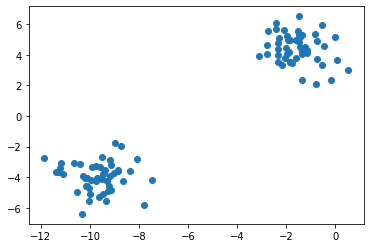

In [6]:
#generating small classification dataset
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
#generate 2d classification dataset
x,y = make_blobs(n_features=2, centers = 2, n_samples=100, random_state=1)
# summarize
plt.scatter(x[:,0],x[:,1])
print(x.shape, y.shape)
print(x[:5])
print(y[:5])

<hr>

As these are Numeric Data, we will model our data with Gaussian Distribution.

This can be achieved by Scipy API, first the distribution need to be constructed using the parameters of distribution eg- Standard Deviation and mean, then the probability density function can be sampled for the given data using norm.pdf() function.

We can <b>estimate</b> the standard devation and mean from prebuilt Numpy functions.

In [7]:
#fit a probabilty function to a univariate data sample
import numpy as np
from scipy.stats import norm

def fit_distribution(data):
    mu = np.mean(data)
    sigma = np.std(data)
    print(mu, sigma)
    dist = norm(mu,sigma)
    return dist

In [8]:
#sort data into classes
xy0 = x[y==0]
xy1 = x[y==1]
print(xy0.shape,xy1.shape)

(50, 2) (50, 2)



Now, using these groups to calculate the prior probabilities.

In [9]:
#calculate priors
priory0 = len(xy0)/len(x)
priory1 = len(xy1)/len(x)
print(priory0,priory1)

0.5 0.5



Now we can call fit_distribution() to to prepare probabilty distribution for each variable, for each class label.

In [10]:
#creating pdf's for y=0
distx1y0 = fit_distribution(xy0[:,0])
distx2y0 = fit_distribution(xy0[:,1])

#creating pdf's for y=1
distx1y1 = fit_distribution(xy1[:,0])
distx2y1 = fit_distribution(xy1[:,1])


-1.5632888906409914 0.787444265443213
4.426680361487157 0.958296071258367
-9.681177100524485 0.8943078901048118
-3.9713794295185845 0.9308177595208521




Now we can use the prepared probabilistic model to make a prediction.

The independent variable prediction can be made using calculated prior probabilities and conditional probability of the value for each variable.

The probability() function below performs this calculation for one input example (array of two values) given the prior and conditional probability distribution for each variable. The value returned is a score rather than a probability as the quantity is not normalized i.e. when we calculate P(class|data), we don't divide it by P(data) as we had seen earlier, a simplification often performed when implementing naive bayes.

In [11]:
#calculating independent conditional probabilty
def probability(x, prior, dist1, dist2):
    return prior * dist1.pdf(x[0]) * dist2.pdf(x[1])

#classifying one sample
xsample,ysample = x[0],y[0]

#calculating the score of the example belonging to the first class and the second class
py0 = probability(xsample, priory0, distx1y0, distx2y0)
py1 = probability(xsample, priory1, distx1y1, distx2y1)
print('P(y=0 | %s) = %.3f' % (xsample, py0*100))
print('P(y=1 | %s) = %.3f' % (xsample, py1*100))

P(y=0 | [-0.79415228  2.10495117]) = 0.348
P(y=1 | [-0.79415228  2.10495117]) = 0.000



Now that's a lot of mathematics and coding involved I will simplify it for you.

We started with <b>make_blobs()</b> which created random points, now talking about the parameters it used:
<ul>
    <li><b>n_samples</b>, it defines the number of samples we need</li>
    <li><b>centers</b>, it defines the number of centers in the data we need as we can see in the graph we get two centers</li>
    <li><b>n_features</b>, it defines the number of features we needed as we can see in y variavble</li>
    <li><b>random_state</b>, it is a boolean we set it to 1 so that we get same data everytime</li>
</ul>

Next comes <b>scipy.stats.norm</b> and <b>fit_distribution</b> functions,
<ul>
    <li><b>scipy.stats.norm</b>, what it does is creates a normal continous random variable. In layman's term, it is used to create a normal distribution of data such that when we next use pdf() function, it returns the value of prabability distribution at that point.</li>
</ul>



Now, talking about the parameters it used:
<ol>
    <li><b>mu</b>, it is the mean of the given data</li>
    <li><b>sigma</b>, it is the standard deviation of given data</li>
</ol>
<img src="https://cdn.wallstreetmojo.com/wp-content/uploads/2019/05/Normal-Distribution-Formula.jpg", width="300px">


Coming up next we used the <b>pdf()</b> (Probability Densitry Function) on our distribution, it takes a value as parameter and finds the probability at that value in the given distribution.

<img src="https://qph.fs.quoracdn.net/main-qimg-3e8079c89f2b8355c6be752b79feaa54.webp">
<hr>
<img src="https://images.slideplayer.com/25/7828801/slides/slide_14.jpg", width="400px">
<img src = "https://docs.scipy.org/doc/scipy/reference/_images/scipy-stats-norm-1.png">

<hr>

In practice, it is better to use optimised implementations of Naive Bayes Algorithm. The scikit-learn library provides three implementations, one for each of the three main probability distributions; for example, BernoulliNB, MultinomialNB, and GaussianNB for binomial, multinomial and Gaussian distributed input variables respectively.

To use a scikit-learn Naive Bayes model, first the model is defined, then it is fit on the training dataset. Once fit, probabilities can be predicted via the predict_proba() function and class labels can be predicted directly via the predict() function.

In [12]:
# example of gaussian naive bayes
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)
# define the model
model = GaussianNB()
# fit the model
model.fit(X, y)
# select a single sample
Xsample, ysample = [X[0]], y[0]
# make a probabilistic prediction
yhat_prob = model.predict_proba(Xsample)
print('Predicted Probabilities: ', yhat_prob)
# make a classification prediction
yhat_class = model.predict(Xsample)
print('Predicted Class: ', yhat_class)
print('Truth: y=%d' % ysample)

Predicted Probabilities:  [[1.00000000e+00 5.52387327e-30]]
Predicted Class:  [0]
Truth: y=0


#### 5 Tips when using Naive Bayes

<ol>
    <li><b>Use a KDE for Complex Distributions</b> If the probability distribution for a variable is complex or unknown, it can be a good idea to use a kernel density estimator or KDE to approximate the distribution directly from the data samples.
        A good example would be the Gaussian KDE.</li><hr>
    <li><b>Decreased Performance With Increasing Variable Dependence</b> By definition, Naive Bayes assumes the input variables are independent of each other.
This works well most of the time, even when some or most of the variables are in fact dependent. Nevertheless, the performance of the algorithm degrades the more dependent the input variables happen to be.</li><hr>
    <li><b>Avoid Numerical Underflow with Log</b> The calculation of the independent conditional probability for one example for one class label involves multiplying many probabilities together, one for the class and one for each input variable. As such, the multiplication of many small numbers together can become numerically unstable, especially as the number of input variables increases.<ul><li>P(yi | x1, x2, …, xn) = log(P(x1|y1)) + log(P(x2|y1)) + … log(P(xn|y1)) + log(P(yi))</li></ul><b>Also known as log-trick when multiplying probabilities</b></li><hr>
    <li><b>Update Probability Distributions</b> As new data becomes available, it can be relatively straightforward to use this new data with the old data to update the estimates of the parameters for each variable’s probability distribution.
This allows the model to easily make use of new data or the changing distributions of data over time.</li><hr>
    <li><b>Use as a Generative Model</b> The probability distributions will summarize the conditional probability of each input variable value for each class label.
These probability distributions can be useful more generally beyond use in a classification model.
For example, the prepared probability distributions can be randomly sampled in order to create new plausible data instances. The conditional independence assumption assumed may mean that the examples are more or less plausible based on how much actual interdependence exists between the input variables in the dataset.</li><hr>

### Advantages of Naive Bayes
<ul>
    <li>It is easy and fast to predict the class of the test data set. It also performs well in multi-class prediction.It is easy and fast to predict the class of the test data set. It also performs well in multi-class prediction.</li>
    <li>When assumption of independence holds, a Naive Bayes classifier performs better compare to other models like logistic regression and you need less training data.</li>
    <li>It perform well in case of categorical input variables compared to numerical variable(s). For numerical variable, normal distribution is assumed (bell curve, which is a strong assumption).</li>
</ul>


### Disadvantages of Naive Bayes
<ul>
    <li>If categorical variable has a category (in test data set), which was not observed in training data set, then model will assign a 0 (zero) probability and will be unable to make a prediction. This is often known as <b>Zero Frequency</b>. To solve this, we can use the smoothing technique. One of the simplest smoothing techniques is called <b>aplace estimation</b>.</li>
    <li>On the other side naive Bayes is also known as a bad estimator, so the probability outputs are not to be taken too seriously.</li>
    <li>Another limitation of Naive Bayes is the assumption of independent predictors. In real life, it is almost impossible that we get a set of predictors which are completely independent.</li>
</ul>


### Applications of Naive Bayes

<ul>
    <li><b>Real Time Prediction</b> Naive Bayes is an eager learning classifier and it is sure fast. Thus, it could be used for making predictions in real time.</li>
    <li><b>Multi Class Prediction</b> This algorithm is also well known for multi class prediction feature. Here we can predict the probability of multiple classes of target variable.</li>
    <li><b>Text classification/ Spam Filtering/ Sentiment Analysis</b> Naive Bayes classifiers mostly used in text classification (due to better result in multi class problems and independence rule) have higher success rate as compared to other algorithms. As a result, it is widely used in Spam filtering (identify spam e-mail) and Sentiment Analysis (in social media analysis, to identify positive and negative customer sentiments)</li>
    <li><b>Recommendation System</b> Naive Bayes Classifier and Collaborative Filtering together builds a Recommendation System that uses machine learning and data mining techniques to filter unseen information and predict whether a user would like a given resource or not.</li>
</ul>


### When to use
<ul>
    <li>Text Classification</li>
    <li>when dataset is huge</li>
    <li>When you have small training set</li>
</ul>


## Iris Flower Species Dataset
##### Training the dataset from Scratch
The Iris Flower Dataset involves predicting the flower species given measurements of iris flowers.

It is a multiclass classification problem. The number of observations for each class is balanced. There are 150 observations with 4 input variables and 1 output variable. The variable names are as follows:
<ul>
    <li>Sepal length in cm.</li>
<li>Sepal width in cm.
<li>Petal length in cm.
<li>Petal width in cm.
<li>Class
</ul>

Dataset can be downloaded from https://www.kaggle.com/uciml/iris/data#

<b>5 steps we will be following are:</b>
<ol>
    <li>Step 1: Separate By Class.
        <li>Step 2: Summarize Dataset.
            <li>Step 3: Summarize Data By Class.
                <li>Step 4: Gaussian Probability Density Function.
                    <li>Step 5: Class Probabilities.
                        </ol>


#### Step 1: Separate by class

In [13]:
#split the dataset by class values returns a dictionary
def separate_class(dataset):
    separated = dict()
    for i in range(len(dataset)):
        vector = dataset[i]
        class_value = vector[-1]
        if (class_value not in sperated):
            separated[class_value]= list()
        separated[class_value].append(vector)
    return separated

Putting this together we can test our function on the contrived dataset.

0
[3.393533211, 2.331273381, 0]
[3.110073483, 1.781539638, 0]
[1.343808831, 3.368360954, 0]
[3.582294042, 4.67917911, 0]
[2.280362439, 2.866990263, 0]
1
[7.423436942, 4.696522875, 1]
[5.745051997, 3.533989803, 1]
[9.172168622, 2.511101045, 1]
[7.792783481, 3.424088941, 1]
[7.939820817, 0.791637231, 1]


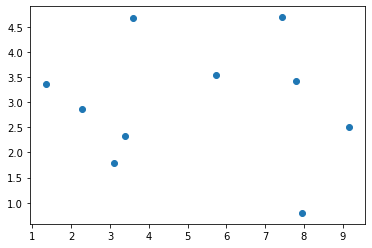

In [14]:
# Example of separating data by class value
 
# Split the dataset by class values, returns a dictionary
def separate_by_class(dataset):
    separated = dict()
    for i in range(len(dataset)):
        vector = dataset[i]
        class_value = vector[-1]
        if (class_value not in separated):
            separated[class_value] = list()
        separated[class_value].append(vector)
    return separated
 
# Test separating data by class
dataset = [[3.393533211,2.331273381,0],
[3.110073483,1.781539638,0],
[1.343808831,3.368360954,0],
[3.582294042,4.67917911,0],
[2.280362439,2.866990263,0],
[7.423436942,4.696522875,1],
[5.745051997,3.533989803,1],
[9.172168622,2.511101045,1],
[7.792783481,3.424088941,1],
[7.939820817,0.791637231,1]]

separated = separate_by_class(dataset)

#for plotting graph as well
import matplotlib.pyplot as plt

plt.scatter([row[0] for row in dataset],[row[1] for row in dataset])
for label in separated:
    print(label)
    for row in separated[label]:
        print(row)

<br>
<hr>

#### Step 2: Summarize Dataset

We need two statistics from the given data, that is Standard Deviation and Mean.

The mean is the average value and can be calculated as:
<ul><li>
    mean = sum(x)/n * count(x)</li></ul>
    
The sample standard deviation is calculated as the mean difference from the mean value. This can be calculated as:
<ul><li>$$
StandardDeviation = sqrt((\sum_i^n (x_i – mean(x))^2) / N-1)$$</ul>



In [15]:
def mean(numbers):
    return sum(numbers)/float(len(numbers))

In [16]:
from math import sqrt

# Calculate the standard deviation of a list of numbers
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
    return sqrt(variance)

We require the mean and standard deviation statistics to be calculated for each input attribute or each column of our data.

Once calculated, we can gather the statistics together into a list or tuple of statistics. Then, repeat this operation for each column in the dataset and return a list of tuples of statistics.

In [17]:
# Calculate the mean, stdev and count for each column in a dataset
def summarize_dataset(dataset):
    #zip(*iters) zip the data in accordance to columns, i.e. map the similar index of multiple containers
    summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
    del(summaries[-1]) #deleting for the last column
    return summaries

In [18]:
summary = summarize_dataset(dataset)
print(summary)

[(5.178333386499999, 2.7665845055177263, 10), (2.9984683241, 1.218556343617447, 10)]


<hr>

#### Step 3: Summarize Data by Class

We require statistics from our training dataset organized by class.

Above, we have developed the separate_by_class() function to separate a dataset into rows by class. And we have developed summarize_dataset() function to calculate summary statistics for each column.

In [19]:
# Split dataset by class then calculate statistics for each row
def summarize_by_class(dataset):
    separated = separate_by_class(dataset)
    summaries = dict()
    #print(separated.items())
    for class_value, rows in separated.items():
        summaries[class_value] = summarize_dataset(rows)
    return summaries

In [20]:
summary = summarize_by_class(dataset)
for label in summary:
    print(label)
    for row in summary[label]:
        print(row)

0
(2.7420144012, 0.9265683289298018, 5)
(3.0054686692, 1.1073295894898725, 5)
1
(7.6146523718, 1.2344321550313704, 5)
(2.9914679790000003, 1.4541931384601618, 5)



<hr>

#### Step 4: Gaussian Probability Density Function

Calculating the probability or likelihood of observing a given real-value like X1 is difficult.

One way we can do this is to assume that X1 values are drawn from a distribution, such as a bell curve or Gaussian distribution.

A Gaussian distribution can be summarized using only two numbers: the mean and the standard deviation. Therefore, with a little math, we can estimate the probability of a given value. This piece of math is called a Gaussian Probability Distribution Function (or Gaussian PDF) and can be calculated as:
<ul><li>$$
    f(x) = (1 / sqrt(2 * PI) * sigma) * exp(-((x-mean)^2 / (2 * sigma^2)))$$</li></ul>
<img src="https://qph.fs.quoracdn.net/main-qimg-3e8079c89f2b8355c6be752b79feaa54.webp" width="400px">
    
Where sigma is the standard deviation for x, mean is the mean for x and PI is the value of pi.

In [21]:
# Gaussian PDF
from math import sqrt
from math import pi
from math import exp

# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean, stdev):
    exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
    return (1 / (sqrt(2 * pi) * stdev)) * exponent

# Test Gaussian PDF
print(calculate_probability(1.0, 1.0, 1.0))
print(calculate_probability(2.0, 1.0, 1.0))
print(calculate_probability(0.0, 1.0, 1.0))

0.3989422804014327
0.24197072451914337
0.24197072451914337



<hr>

#### Step 4: Class Probabilites

Now it is time to use the statistics calculated from our training data to calculate probabilities for new data.

Probabilities are calculated separately for each class. This means that we first calculate the probability that a new piece of data belongs to the first class, then calculate probabilities that it belongs to the second class, and so on for all the classes.

The probability that a piece of data belongs to a class is calculated as follows:
<uL><li>
P(class|data) = P(X|class) * P(class)</ul>

The input variables are treated separately, giving the technique it’s name “naive“. For the above example where we have 2 input variables, the calculation of the probability that a row belongs to the first class 0 can be calculated as:
<ul>
<li>
P(class=0|X1,X2) = P(X1|class=0) * P(X2|class=0) * P(class=0)</ul>


Below is a function named calculate_class_probabilities() that ties all of this together.

It takes a set of prepared summaries and a new row as input arguments.

First the total number of training records is calculated from the counts stored in the summary statistics. This is used in the calculation of the probability of a given class or P(class) as the ratio of rows with a given class of all rows in the training data.

Next, probabilities are calculated for each input value in the row using the Gaussian probability density function and the statistics for that column and of that class. Probabilities are multiplied together as they accumulated.

This process is repeated for each class in the dataset.

In [22]:
# Calculate the probabilities of predicting each class for a given row
def calculate_class_probabilities(summaries, row):
    total_rows = sum([summaries[label][0][2] for label in summaries])
    probabilities = dict()
    for class_value, class_summaries in summaries.items():
        probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
        for i in range(len(class_summaries)):
            mean, stdev, count = class_summaries[i]
            probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
    return probabilities

In [23]:
probabilities = calculate_class_probabilities(summary, dataset[0])
print(probabilities)

{0: 0.05032427673372076, 1: 0.00011557718379945765}


## Summing it all Together

In [24]:
# Example of calculating class probabilities
from math import sqrt
from math import pi
from math import exp

# Split the dataset by class values, returns a dictionary
def separate_by_class(dataset):
    separated = dict()
    for i in range(len(dataset)):
        vector = dataset[i]
        class_value = vector[-1]
        if (class_value not in separated):
            separated[class_value] = list()
        separated[class_value].append(vector)
    return separated

# Calculate the mean of a list of numbers
def mean(numbers):
    return sum(numbers)/float(len(numbers))

# Calculate the standard deviation of a list of numbers
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
    return sqrt(variance)

# Calculate the mean, stdev and count for each column in a dataset
def summarize_dataset(dataset):
    summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
    del(summaries[-1])
    return summaries

# Split dataset by class then calculate statistics for each row
def summarize_by_class(dataset):
    separated = separate_by_class(dataset)
    summaries = dict()
    for class_value, rows in separated.items():
        summaries[class_value] = summarize_dataset(rows)
    return summaries

# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean, stdev):
    exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
    return (1 / (sqrt(2 * pi) * stdev)) * exponent

# Calculate the probabilities of predicting each class for a given row
def calculate_class_probabilities(summaries, row):
    total_rows = sum([summaries[label][0][2] for label in summaries])
    probabilities = dict()
    for class_value, class_summaries in summaries.items():
        probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
        for i in range(len(class_summaries)):
            mean, stdev, _ = class_summaries[i]
            probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
    return probabilities

# Test calculating class probabilities
dataset = [[3.393533211,2.331273381,0],
[3.110073483,1.781539638,0],
[1.343808831,3.368360954,0],
[3.582294042,4.67917911,0],
[2.280362439,2.866990263,0],
[7.423436942,4.696522875,1],
[5.745051997,3.533989803,1],
[9.172168622,2.511101045,1],
[7.792783481,3.424088941,1],
[7.939820817,0.791637231,1]]
summaries = summarize_by_class(dataset)
probabilities = calculate_class_probabilities(summaries, dataset[0])
print(probabilities)

{0: 0.05032427673372076, 1: 0.00011557718379945765}


## Iris Flower Species Case Study (Scratch)
This section applies the Naive Bayes algorithm to the Iris flowers dataset.

The first step is to load the dataset and convert the loaded data to numbers that we can use with the mean and standard deviation calculations. For this we will use the helper function load_csv() to load the file, str_column_to_float() to convert string numbers to floats and str_column_to_int() to convert the class column to integer values.

We will evaluate the algorithm using k-fold cross-validation with 5 folds. This means that 150/5=30 records will be in each fold. We will use the helper functions evaluate_algorithm() to evaluate the algorithm with cross-validation and accuracy_metric() to calculate the accuracy of predictions.

A new function named predict() was developed to manage the calculation of the probabilities of a new row belonging to each class and selecting the class with the largest probability value.



In [33]:
# Naive Bayes On The Iris Dataset
from csv import reader
from random import seed
from random import randrange
from math import sqrt
from math import exp
from math import pi

# Load a CSV file
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

# Convert string column to float
# it takes each column of each row and converts it to float
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())

# Convert string column to integer ie converts name of different classes to Integer (0,1,2,...)
def str_column_to_int(dataset, column):
    class_values = [row[column] for row in dataset]
    unique = set(class_values)
    lookup = dict()
    for i, value in enumerate(unique):
        lookup[value] = i
    for row in dataset:
        row[column] = lookup[row[column]]
    return lookup

# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for _ in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds: 
        train_set = list(folds)
        train_set.remove(fold) # what is done here is it checks for combination of each possible fold just like cross_validation
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold: # and each removed fold becomes the test set, for cross_validation
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None # added none to last column, which is the column for classes
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores

# Split the dataset by class values, returns a dictionary
def separate_by_class(dataset):
    separated = dict()
    for i in range(len(dataset)):
        vector = dataset[i]
        class_value = vector[-1]
        if (class_value not in separated):
            separated[class_value] = list()
        separated[class_value].append(vector)
    return separated

# Calculate the mean of a list of numbers
def mean(numbers):
    return sum(numbers)/float(len(numbers))

# Calculate the standard deviation of a list of numbers
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
    return sqrt(variance)

# Calculate the mean, stdev and count for each column in a dataset
def summarize_dataset(dataset):
    summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
    del(summaries[-1])
    return summaries

# Split dataset by class then calculate statistics for each row
def summarize_by_class(dataset):
    separated = separate_by_class(dataset)
    summaries = dict()
    for class_value, rows in separated.items():
        summaries[class_value] = summarize_dataset(rows)
    return summaries

# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean, stdev):
    exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
    return (1 / (sqrt(2 * pi) * stdev)) * exponent

# Calculate the probabilities of predicting each class for a given row
def calculate_class_probabilities(summaries, row):
    total_rows = sum([summaries[label][0][2] for label in summaries])
    probabilities = dict()
    for class_value, class_summaries in summaries.items():
        probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
        for i in range(len(class_summaries)):
            mean, stdev, _ = class_summaries[i]
            probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
    return probabilities

# Predict the class for a given row
def predict(summaries, row):
    probabilities = calculate_class_probabilities(summaries, row)
    best_label, best_prob = None, -1
    for class_value, probability in probabilities.items():
        if best_label is None or probability > best_prob:
            best_prob = probability
            best_label = class_value
    return best_label

# Naive Bayes Algorithm
def naive_bayes(train, test):
    summarize = summarize_by_class(train)
    predictions = list()
    for row in test:
        output = predict(summarize, row)
        predictions.append(output)
    return(predictions)

# Test Naive Bayes on Iris Dataset
seed(1)
filename = 'iris.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])-1):
    str_column_to_float(dataset, i)
# convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)
# evaluate algorithm
n_folds = 5
scores = evaluate_algorithm(dataset, naive_bayes, n_folds)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Scores: [93.33333333333333, 96.66666666666667, 100.0, 93.33333333333333, 93.33333333333333]
Mean Accuracy: 95.333%




Now doing few more modification to get the result in desired form.

We can fit the model on the entire dataset and then use the model to make predictions for new observations (rows of data).
A complete example of fitting the Naive Bayes model on the entire dataset and making a single prediction for a new observation is listed below.


In [34]:
# Make Predictions with Naive Bayes On The Iris Dataset
from csv import reader
from math import sqrt
from math import exp
from math import pi

# Load a CSV file
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

# Convert string column to float
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())

# Convert string column to integer
def str_column_to_int(dataset, column):
    class_values = [row[column] for row in dataset]
    unique = set(class_values)
    lookup = dict()
    for i, value in enumerate(unique):
        lookup[value] = i
        print('[%s] => %d' % (value, i))
    for row in dataset:
        row[column] = lookup[row[column]]
    return lookup

# Split the dataset by class values, returns a dictionary
def separate_by_class(dataset):
    separated = dict()
    for i in range(len(dataset)):
        vector = dataset[i]
        class_value = vector[-1]
        if (class_value not in separated):
            separated[class_value] = list()
        separated[class_value].append(vector)
    return separated

# Calculate the mean of a list of numbers
def mean(numbers):
    return sum(numbers)/float(len(numbers))

# Calculate the standard deviation of a list of numbers
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
    return sqrt(variance)

# Calculate the mean, stdev and count for each column in a dataset
def summarize_dataset(dataset):
    summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
    del(summaries[-1])
    return summaries

# Split dataset by class then calculate statistics for each row
def summarize_by_class(dataset):
    separated = separate_by_class(dataset)
    summaries = dict()
    for class_value, rows in separated.items():
        summaries[class_value] = summarize_dataset(rows)
    return summaries

# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean, stdev):
    exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
    return (1 / (sqrt(2 * pi) * stdev)) * exponent

# Calculate the probabilities of predicting each class for a given row
def calculate_class_probabilities(summaries, row):
    total_rows = sum([summaries[label][0][2] for label in summaries])
    probabilities = dict()
    for class_value, class_summaries in summaries.items():
        probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
        for i in range(len(class_summaries)):
            mean, stdev, _ = class_summaries[i]
            probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
    return probabilities

# Predict the class for a given row
def predict(summaries, row):
    probabilities = calculate_class_probabilities(summaries, row)
    best_label, best_prob = None, -1
    for class_value, probability in probabilities.items():
        if best_label is None or probability > best_prob:
            best_prob = probability
            best_label = class_value
    return best_label

# Make a prediction with Naive Bayes on Iris Dataset
filename = 'iris.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])-1):
    str_column_to_float(dataset, i)
# convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)
# fit model
model = summarize_by_class(dataset)
# define a new record
row = [5.7,2.9,4.2,1.3]
# predict the label
label = predict(model, row)
print('Data=%s, Predicted: %s' % (row, label))

[Iris-setosa] => 0
[Iris-versicolor] => 1
[Iris-virginica] => 2
Data=[5.7, 2.9, 4.2, 1.3], Predicted: 1


## Iris Flower Species Case Study (Scipy)

In [37]:
# Naive Bayes Classification

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

In [40]:
# Importing the dataset
dataset = pd.read_csv('iris.csv',header=None)

In [41]:
#looking at the first 5 values of the dataset
dataset.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


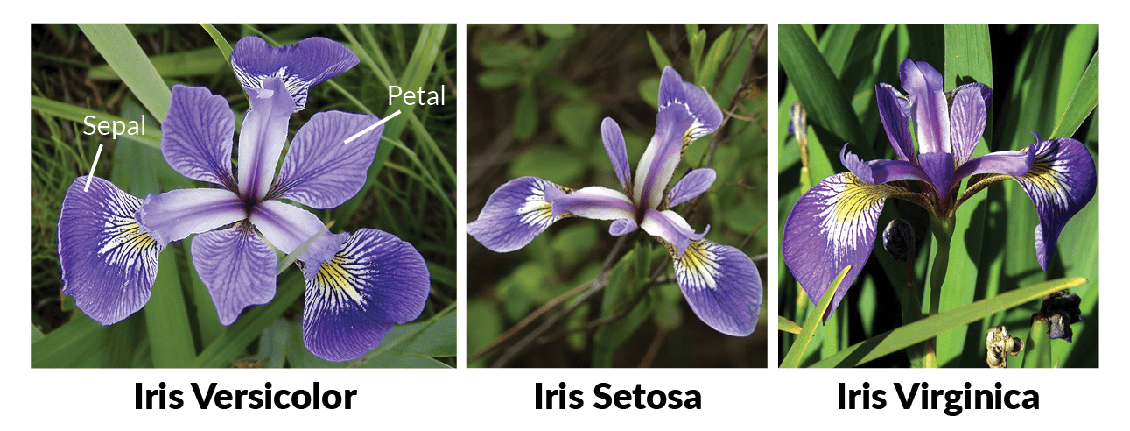

In [43]:
%matplotlib inline
img=mpimg.imread('https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png')
plt.figure(figsize=(20,40))
plt.axis('off')
plt.imshow(img)

In [47]:
#Spliting the dataset in independent and dependent variables
X = dataset.iloc[:,0:4].values
y = dataset.iloc[:,4].values

In [48]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 82)

In [49]:
# Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [50]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [51]:
# Predicting the Test set results
y_pred = nvclassifier.predict(X_test)
print(y_pred)

['Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor']


In [52]:
#lets see the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred)).T
#actual value on the left side and predicted value on the right hand side
#printing the top 5 values
y_compare[:5,:]

array([['Iris-virginica', 'Iris-virginica'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa']], dtype=object)

In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, 
also known as an error matrix. A confusion matrix is a table that is often used to describe the performance of a classification 
model (or “classifier”) on a set of test data for which the true values are known. It allows the visualization of the 
performance of an algorithm.

It allows easy identification of confusion between classes e.g. one class is commonly mislabeled as the other. 
Most performance measures are computed from the confusion matrix.

In [53]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11  0  0]
 [ 0  8  1]
 [ 0  1  9]]


In [57]:
#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', corrPred/(cm.sum()))

Correct predictions:  28
False predictions 2


Accuracy of the Naive Bayes Clasification is:  0.9333333333333333
